# Magnetic field of a charged wire


![hand](figure_05_hand.svg)

https://upload.wikimedia.org/wikipedia/commons/3/3e/Manoderecha.svg

Using the Maxwell equations of magnetostatics (in their integral form) one can derive the vector potential of a current density distribution $ \vec{j}(\vec{r}) $

$
\vec{A}(\vec{r})=\frac{\mu_0}{4\pi}\int\frac{\vec{j}(\vec{r}')}{|\vec{r}-\vec{r}'|}\,\mathrm{d}V'\\
$

from which we can calculate the magnetic field 

$ 
\vec{B}(\vec{r})=\nabla\times\vec{A}(\vec{r})\\
$

For more details on these equations, please consider my course: "Electrodynamics based on Maxwell equations" https://www.udemy.com/course/electrodynamics/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Straight wire

- along z axis
- very long: length $ [-l_0,l_0]$ (we will only consider the xy plane, because all other planes will behave equally)
- very thin: radius $r_0$ (basically non-zero only for $x = 0$, $y = 0$)

In [2]:
mu0 = 1

# straight wire
j0 = 1 # Ampere / meter^2
r0 = 0.001 # m
l0 = 1000 # m

def j(r):
    return np.array([0.0, 0.0, j0])

In [3]:
j(np.array([0, 0, 5]))

array([0., 0., 1.])

In [4]:
coordMax = 4.9
numpoints = 50
d = 2*coordMax / (numpoints-1)

# Coordinates
coords = np.array(np.meshgrid(
    np.linspace(-coordMax, coordMax, numpoints),
    np.linspace(-coordMax, coordMax, numpoints),
    np.zeros(1),
    indexing='ij'
))

In [5]:
coords[:, numpoints//2-1, numpoints//2, 0]

array([-0.1,  0.1,  0. ])

In [6]:
# Vector potential
A = np.array(np.meshgrid(
    np.zeros(numpoints),
    np.zeros(numpoints),
    np.zeros(1),
    indexing='ij'
))

In [7]:
A[:, numpoints//2-1, numpoints//2, 0]

array([0., 0., 0.])

In [8]:
numint = 5001

for ix in np.arange(numpoints):
    for iy in np.arange(numpoints):
        r = np.array([-coordMax+ix*d, -coordMax+iy*d, 0.0])
        for zj in np.linspace(-l0, l0, numint):
            rj = np.array([ 0.0, 0.0, zj ])
            A[:, ix, iy, 0] = A[:, ix, iy, 0] + j(rj) / np.sqrt( r[0]**2 + r[1]**2 + rj[2]**2 )

In [9]:
dz = (2*l0) / (numint-1)
#dx = (2*coordMax) / (numpoints-1)
#dy = (2*coordMax) / (numpoints-1)
#A *= mu0 / (4*np.pi) * dx * dy * dz
df = np.pi * r0**2
A *= mu0 / (4*np.pi) * df * dz

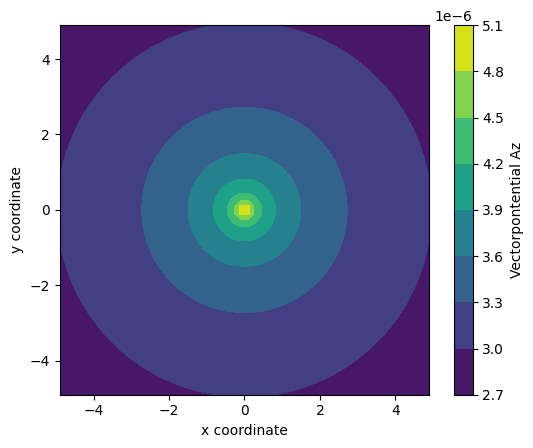

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect(1)
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')

plt.contourf(coords[0, :, :, 0], coords[1, :, :, 0], A[2, :, :, 0])
cbar = plt.colorbar()
cbar.set_label('Vectorpontential Az')

__Analytical solution:__

$ \vec{A}(\vec{r}) = \frac{\mu_0}{2\pi}jF\log\frac{2l_0}{\sqrt{x^2+y^2}}\vec{e}_z$

For more details on these equations, please consider my course: "Electrodynamics based on Maxwell equations" https://www.udemy.com/course/electrodynamics/

![derivation_wire](figure_05_derivation_wire.png)

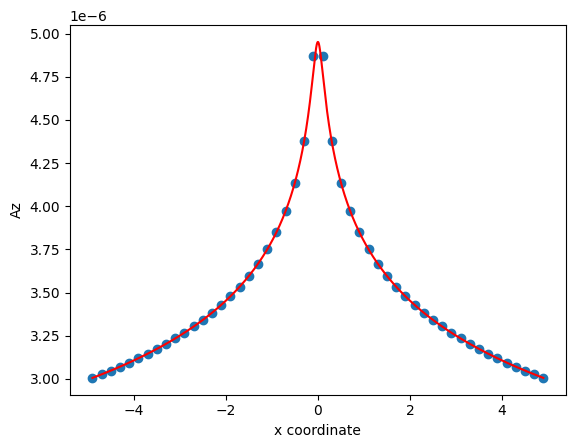

In [11]:
plt.xlabel('x coordinate')
plt.ylabel('Az')

plt.scatter(coords[0, :, numpoints//2, 0], A[2, :, numpoints//2, 0])

x_list = np.linspace(-coordMax, coordMax, 10001)
plt.plot(
    x_list,
    mu0/(2*np.pi) * j0 * df * np.log( 2*l0/ np.sqrt( x_list**2 + coords[1, 0, numpoints//2, 0]**2 ) ),
    'red'
)

__We can calculate the magnetic field__


$$
\vec{B}(\vec{r})=\nabla\times\vec{A}(\vec{r})=\begin{pmatrix}
\frac{\partial}{\partial y}A_z(\vec{r}) - \frac{\partial}{\partial z}A_y(\vec{r})\\
\frac{\partial}{\partial z}A_x(\vec{r}) - \frac{\partial}{\partial x}A_z(\vec{r})\\
\frac{\partial}{\partial x}A_y(\vec{r}) - \frac{\partial}{\partial y}A_x(\vec{r})
\end{pmatrix}
$$


Since the vector potential only changes in the xy plane and is considered to be constant along z (for infinite $(l_0)$), we know
$
\frac{\partial }{\partial z} A_x(\vec{r}) = \frac{\partial }{\partial z} A_y(\vec{r}) = 0
$

In [12]:
# Empty List

B = np.array(np.meshgrid(
    np.zeros(numpoints),
    np.zeros(numpoints),
    np.zeros(1),
    indexing='ij'
))

In [13]:
B[0, 1:-1, 1:-1, 0] = (A[2, 1:-1, 2:, 0] - A[2, 1:-1, :-2, 0]) / (2*d)
B[1, 1:-1, 1:-1, 0] = -(A[2, 2:, 1:-1, 0] - A[2, :-2, 1:-1, 0]) / (2*d)
B[2, 1:-1, 1:-1, 0] = (A[1, 2:, 1:-1, 0] - A[1, :-2, 1:-1, 0]) / (2*d) - (A[0, 1:-1, 2:, 0] - A[0, 1:-1, :-2, 0]) / (2*d)

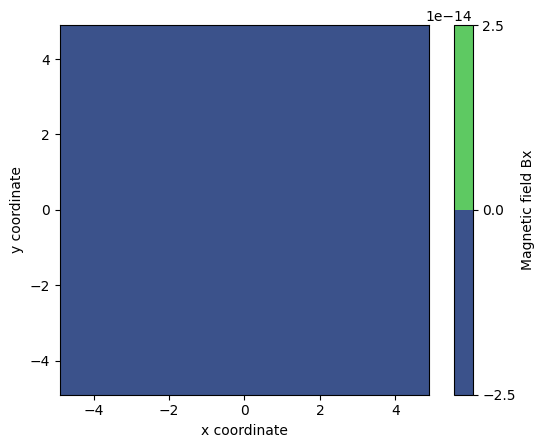

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect(1)
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')

plt.contourf(coords[0, :, :, 0], coords[1, :, :, 0], A[0, :, :, 0])
cbar = plt.colorbar()
cbar.set_label('Magnetic field Bx')

__Analytical solution:__

$ \vec{B}(\vec{r}) = \frac{\mu_0}{2\pi}jF\frac{1}{\sqrt{x^2+y^2}}\begin{pmatrix}-y\\x\\0\end{pmatrix}$

![hand](figure_05_hand.svg)

https://upload.wikimedia.org/wikipedia/commons/3/3e/Manoderecha.svg